# Linear regression I

You have probably seen these concepts before without even knowing about it, like let's <code>**"Line of best fit"**</code> ussually first seen in hight school math class on statistics lessons.

In statistics, <code>**linear regression is a linear approach to modelling the relationship between a dependent variable(y) and one or more independent variables(x)**</code>. In linear regression, the relationships are modeled using linear predictor functions whose unknown model parameters are estimated from the data. Linear Regression is one of the most popular algorithms in Machine Learning. That’s due to its relative simplicity and well known properties.

In [8]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# just for the nicer style
plt.style.use('seaborn-whitegrid')
from pandas import Series, DataFrame
from sklearn.datasets import load_boston

We will use Boston housing toy dataset
[Boston housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)

In [11]:
data_set = load_boston()
#print(data_set.DESCR)

Lets plot our dataset and see relation between different sizes(room numbers) that were sold for a range of prices.

Text(0, 0.5, "Price in 1000's")

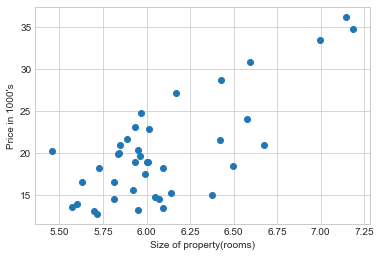

In [12]:
plt.scatter(data_set.data[:40,5], data_set.target[:40],)
plt.xlabel("Size of property(rooms)")
plt.ylabel("Price in 1000's")

Lets say that you are trying to sale a specific house in this neighborhood and this plot might tell for how much you would be able to sell your house. Well one thing we can do is fit a model. Fit a straigt line to this data and base on that predict what price should he set of his property. 

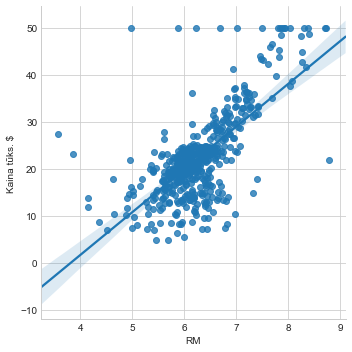

In [15]:
boston_df = DataFrame(data_set.data)
boston_df.columns = data_set.feature_names
boston_df['Kaina tūks. $'] = data_set.target
sns.lmplot('RM', 'Kaina tūks. $', data=boston_df)

This is an example of <code>**supervised learning**</code>. We're given the quotes, sort of "right answer" for each of the example. Namely we were told what was the actuall house price of each of houses in our data set. And its a <code>**[regression](https://www.vle.lt/Straipsnis/regresija-105153)**</code> problem where term regression refers to the fact that we are predicting a real valued output. The other most common type of supervised learning problem is called the <code>**classification problem**</code> wehere we predict discrete value outputs (belongs to one or another class, sort of 1-0 valued discrete output). 

Formally in supervised learning we have a data set and this data set is called <code>**training set**</code>. Let say for housing prices example we have a training set of different housing prices and our job is to learn from this data how to predict prices. 

In [25]:
sample = boston_df[["RM", "Kaina tūks. $"]]
sample.head()

,RM,Kaina
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


Lets place a notion for further use:
 * <code>**m**</code> = number of training examples
 * <code>**x's**</code> = "input" variables a.k.a <code>**features**</code>
 * <code>**y's**</code> = "output" varaibles a.k.a <code>**targets**</code>
 * <code>**(x,y)**</code> = single training example
 * <code>**(x', y')**</code> = reference to i'th training example, <code>**not x or y to power of i**</code>
 <br>
 
We will have quite a lot of symbols. Don't worry if you can't memorize them, eventually while progressing they will sink in.
<code>**What's y(3) in boston data set?**</code>

We saw that with the <code>**training set**</code>  like ours of housing prices and we feed that to our <code>**model.k.a learning algorithm**</code>. It's the job of a learning algorith to ouput a function which by convention is usually denoted lowercase <code>**h**</code> and stands for <code>**hypothesis**</code> (in early days of ML it was named liked that). And job of hypothesis is to take a <code>**input(x)**</code> lets say the size of the house and estimate the <code>**output(y)**</code>. So <code>**h is a function that maps from x's to y's**</code>. 

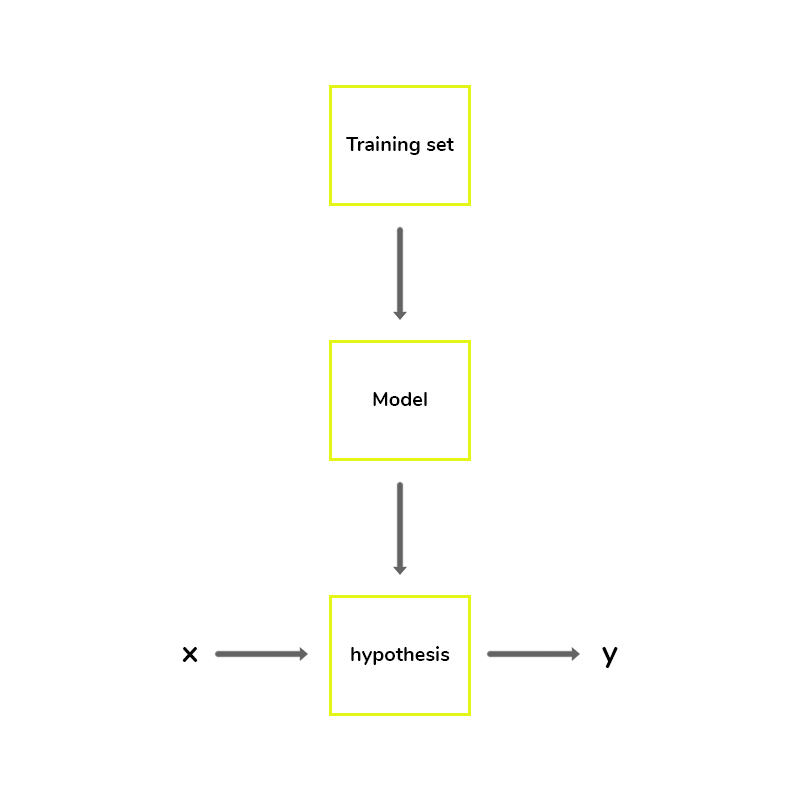

Representation of hypothesis, warries a lot. We will use most of the time this:

$$ y = mx +b $$

$$h_{\theta}(x) = \theta_{0} + \theta_{1}x$$
<br>
$$h_{\theta}(x)\rightarrow h(x)$$

<br>

And plotting this all it means that we are going to predicy that <code>**y is  a linear function of x**</code>. It's predicting that y is some straight line of f(x). <code>**And why a linear function**</code>, to be simple at least so far. Sometimes we will fit more complicated perhaphs non-linear functions as well. But since this linear case is the <code>**simplest building block**</code> that we will build on to eventually have more complex models. Reminder that this particular model is called <code>**linear regression with 1 variable with the variable being x**</code> Prediciting all the prices as function of one variable x. And the more often used name for this model is <code>**univariate(smart sounding name for one variable) linear regression**</code>. 

## Cost function , mathematical definition

Cost function a.k.a <code>**mean squared error function**</code> will let us figure out how to fit the best possible straight line to our data. 
We had this trainig set

In [29]:
sample = boston_df[["RM", "Kaina"]]
sample.head()

,RM,Kaina
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


And our linear function (hypothesis):

$$ h_{\theta}(x) = \theta_{0} + \theta_{1}x$$

Which acually if you take a good look is  knowned as a <code>**line function**</code>:

$$y = mx + b$$

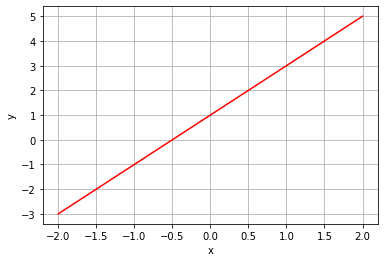

In [159]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-2,2,100)
m = 2
b = 1

y = m * x + b

plt.plot(x, y, '-r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

To introduce a little bit more terminology these theta's are <code>**named parameters of the model**</code>. And we will focus on how to choose these two parameter values. With different choices of the parameters we get different hypothesis functions.

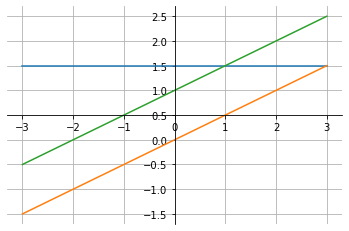

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(-3,3,100)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

theta_pairs = [
    (1.5, 0.0),
    (0.0, 0.5),
    (1.0, 0.5)
]

for pair in theta_pairs:
    θ_0, θ_1 = pair
    plt.plot(x, θ_0 + θ_1 * x)
plt.grid()
plt.show()

In linear regresion we have a training set like maybe the one we have plotted here. What we want to do is to come up with value for the parameters so that the straight line we get out if this corresponsd to straight line that somehow fits the data well. 

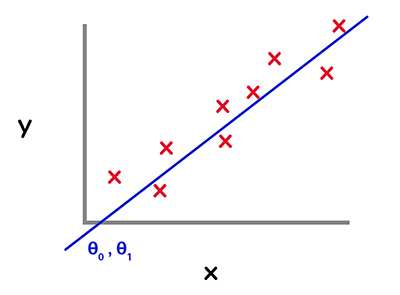

How do we come up with parameter values that correspond to a good fit ? The main idea is we get to choose our parameter that <code>**h(x) meaning the value we predict on input x is at least close to the values y**</code> for the examples in our training set. We are given a number of examples where we know (x - as the size of house) and we know (y the actual price of it). So lets try to choose values for the parameters so that at least in training set we make reason of the active prediction for the y values. We are going to solved so called <code>**minimization problem**</code>.

$$\min\theta_{0} \theta_{1}$$

We want the difference between h(x) and y to be small. And one thing we might do is try to minimize the <code>**square difference between the output of the hypothesis and the actual price of property**</code>.

$$(h_{\theta}(x ) -y)^2$$

You can think of this error as the vertical distance between hypothesis and y value (price of property)

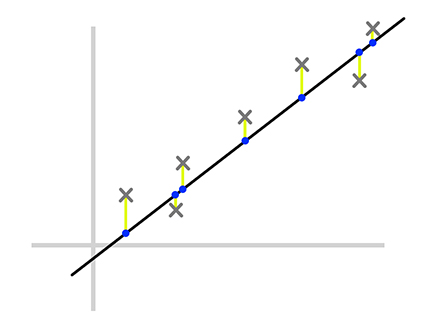

---------------------------------------------------------------------------------------------------
<code>**THE UGLY PROOF and UGLY ALGEBRA for SQUARE ERROR**</code> 
<br>
$$ SE_{line} = n\bar{y^2} - 2mn\bar{xy} - 2bn\bar{y} + m^2n\bar{x^2} + 2mbn\bar{x} + nb^2$$
 * n sample size
 * m is slope
 * b is intereceptor
---------------------------------------------------------------------------------------------------

We really have to sum over our training set of the square difference  between prediction with input minus the actual price of particular property. To make our math a little bit easier we will try to minimize our average with constant <code>**1/2**</code> in front just for sake to make a convenience for the computation of the gradient descent, as the derivative term of the square function will cancel out the 1/2.

$$ \min\theta_{0} \theta_{1} \   \ \dfrac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)} ) -y^{(i)})^2$$


This is our overal objective function for linear regression. And by convention we ussualy define a <code>**cost function**</code> or <code>**mean squared error function**</code>. It turn out that we take these squares of the errors because this is reasonable choice and work well for most problems for regression although there are other cost functions that will work well too but this one is the most commonly used.

$$ J(\theta_{0}, \theta_{1}) = \dfrac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)} ) -y^{(i)})^2$$

Just to be sure this equation is clear, <code>**h subscript theta of x**</code> is 
$$ h_{\theta}(x) = \theta_{0} + \theta_{1}x$$

And our optimization objectives is to minimize:
$$\min\theta_{0}, \theta_{1}  J(\theta_{0}, \theta_{1})$$

-------------------------------------------------------------------------------------------------

To get some inuition what the cost function is and why we want to use it let work with a simplifed hypothesis when we have only <code>**one parameter theta one, theta zero is equal to zero**</code>.
$$h_{\theta}(x) = \theta_{1}x, \theta_{0} = 0 $$

<br>

$$J(\theta_{1}) = \dfrac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)} ) -y^{(i)})^2 , h_{\theta}(x^{(i)}) = \theta_{1}x^{(i)}$$

our optimization objectives is to minimize J(θ 1)
<br>
$$\min J(\theta_{1})$$

In graph it means that if θ 0 = 0 then that coressponds to choosing only hypothesis function that pass through the <code>**(0,0)**</code>. This is simplified definition of a hypothesis in cost function will let us understand it better.

-----------------------------------------------------------------------------------
<code>**Key functions to understand**</code>:

\begin{multline*}
h_{\theta}(x)
\end{multline*}
(<code>**for fixed θ1, this is a function of x**</code>) -----


\begin{multline*}
J(\theta_{1})
\end{multline*}
(<code>**function of the parameter θ1**</code>, which controls the slope of the straight line)

Let say it's our trainig set with three points are at (1, 1), (2, 2), (3, 3) and we picked value of <code>**θ1 equal to 1**</code>. Hypothesis is going to look like this straight line over here.  

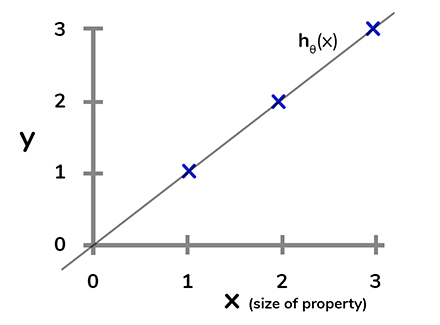

But we want to figure out whats is J(θ1), when <code>**θ1 equals 1**</code>.
$$J(\theta_{1}) = \dfrac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)} ) -y^{(i)})^2 $$
$$  = \dfrac{1}{2m}\sum_{i=1}^{m}(\theta_{1} x^{i} - y^{i})^2 =  \dfrac{1}{2m}(0^2 + 0^2 + 0^2) = 0^2 = 0 $$,

For the specific training set we have of three training example and if theta one is equal to 1. Then in turns out that:

$$ h_{\theta}(x^{(i)}) = y^{(i)}$$

Now we know that: 
$$J(1) = 0 $$

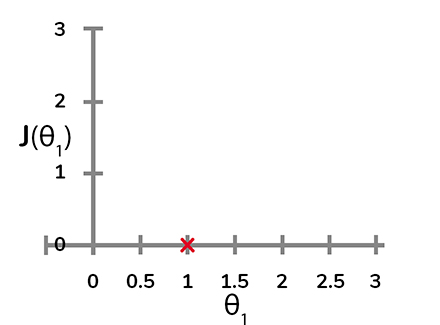

θ1 can take a range of different positive and negative values. Lets tinker with this by chaning theta values.

## Practice exercise

What if theta is equal to <code>**0.5, 1.5, 2**</code> what happens then ?


In this our hypothesis looks like a line with slope that equals to 0.5. What would be J(0.5) ? The sum of square values of the height of these yellow lines that are the difference between y and the predicted value.

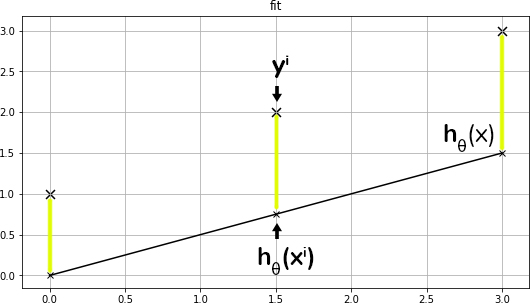

$$ J(0.5) = \dfrac{1}{2m} [(0 - 1)^2 + (0.75 - 2)^2 + (1.5 - 3)^2] = \dfrac{1}{6}(4.8125) = \dfrac{4.8125}{6} \approx 0.8$$

0.8


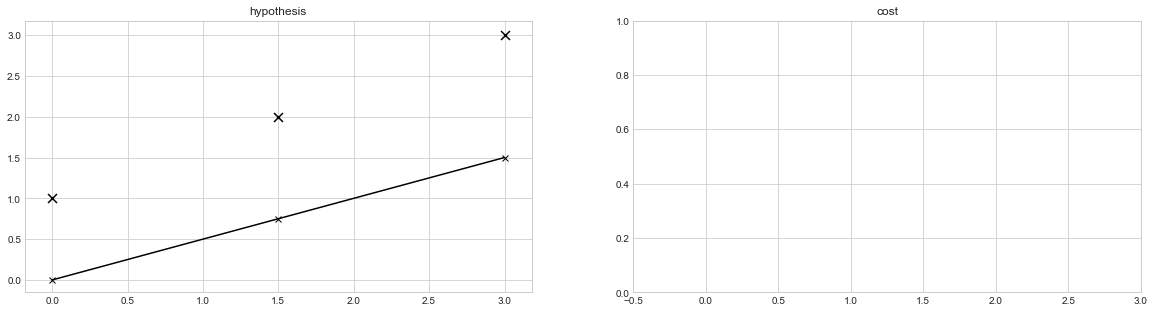

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.array([0,1.5,3])
y = np.array([1,2,3])
m = len(x)

def cost_func(theta):
    error = 0
    for i in range(m):
        error += ((theta*x[i])-y[i])**2
    return error/(2*m)

def hypothesis(x, theta):
    return x * theta


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
ax[0].plot(x, hypothesis(x,theta1), marker='x',color='k')
ax[0].scatter(x, y, marker='x', s=80, color='k')

ax[1].set_title('cost')
ax[0].set_title('hypothesis')
ax[1].set_xlim(-0.5,3)

print(np.round(cost_func(theta1),2))
plt.show()

## Practice execise

* <code>**a)**</code> Suppose we have a training set with 3 examples (1,1),(2,2),(3,3), if <code>**theta is θ,  what is J(θ)?**</code>
<br>
* <code>**b)**</code> What would be <code>**J(θ) of θ = -0.5**</code>

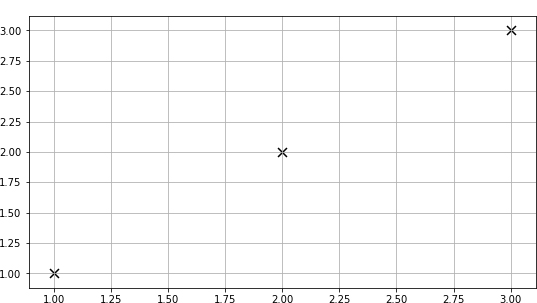

By keep on measuring errors of different theta parameters, you will eventually after computing range of values you will see how does <code>**function J(θ) looks like**</code>. So in conclusion each value of theta 1 coresponds to a different hypothesis <code>**(fit line)**</code> and of theta 1 we can derive different value of J(θ). 

Remember the optimizaton objective for our learning algorithm (linear regresion) is we want to choose the value of theta that minimizes J(θ 1). And by looking at this curve  the value that minimizes J(θ 1) is when θ 1 = 0. And that is indeed the best possible straight line fit for our data set.  

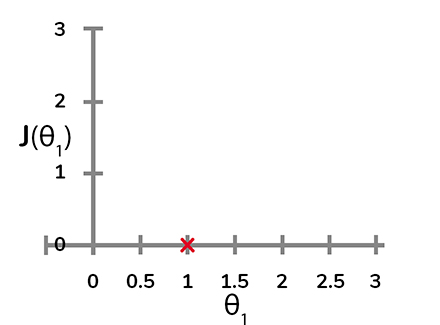
To understand cost function we have simplyfied the algorithm so that it only had one parameter, the second one was set to zero. We must go and look into initial problem formulation to get better sense what J is doing in the original linear regresion formulation. And look at some cases in <code>**[__linear regression_II](./__linear_regression_II.ipynb)**</code> involving both θ 0 and θ 1, that is without setting θ 0 to 0.

------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------

## Draft 

[0.046052631578947366, array([0.01837002]), array([0.00732766]), array([0.00292294]), array([0.00116594])]


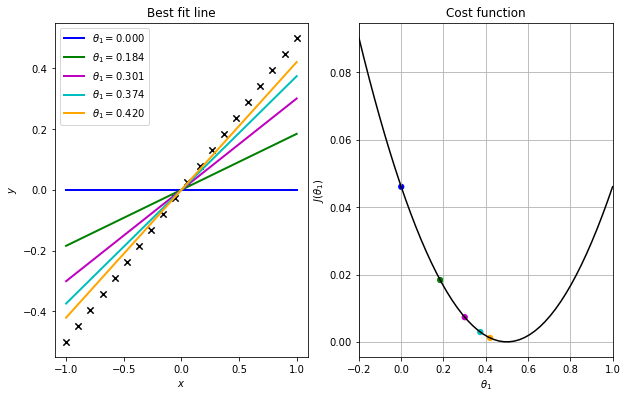

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# The data to fit
m = 20
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta1_true * x

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(x, y, marker='x', s=40, color='k')

def cost_func(theta1):
    """The cost function, J(theta1) describing the goodness of fit."""
    theta1 = np.atleast_2d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta1))**2, axis=1)/2

def hypothesis(x, theta1):
    """Our "hypothesis function", a straight line through the origin."""
    return theta1*x

# First construct a grid of theta1 parameter pairs and their corresponding
# cost function values.
theta1_grid = np.linspace(-0.2,1,50)
J_grid = cost_func(theta1_grid[:,np.newaxis])

# The cost function as a function of its single parameter, theta1.
ax[1].plot(theta1_grid, J_grid, 'k')

# Take N steps with learning rate alpha down the steepest gradient,
# starting at theta1 = 0.
N = 5
alpha = 1
theta1 = [0]
J = [cost_func(theta1[0])[0]]
for j in range(N-1):
    last_theta1 = theta1[-1]
    this_theta1 = last_theta1 - alpha / m * np.sum(
                                    (hypothesis(x, last_theta1) - y) * x)
    theta1.append(this_theta1)
    J.append(cost_func(this_theta1))

# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, hypothesis(x, theta1[0]), color=colors[0], lw=2,label=r'$\theta_1 = {:.3f}$'.format(theta1[0]))

for j in range(1,N):
    ax[0].plot(x, hypothesis(x, theta1[j]), color=colors[j], lw=2, label=r'$\theta_1 = {:.3f}$'.format(theta1[j]))

# Labels, titles and a legend.
print(J)
ax[1].scatter(theta1, J, c=colors, s=40, lw=0)
ax[1].set_xlim(-0.2,1)
ax[1].set_xlabel(r'$\theta_1$')
ax[1].set_ylabel(r'$J(\theta_1)$')
ax[1].set_title('Cost function')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Best fit line')
ax[0].legend(loc='upper left')

plt.grid()
plt.show();